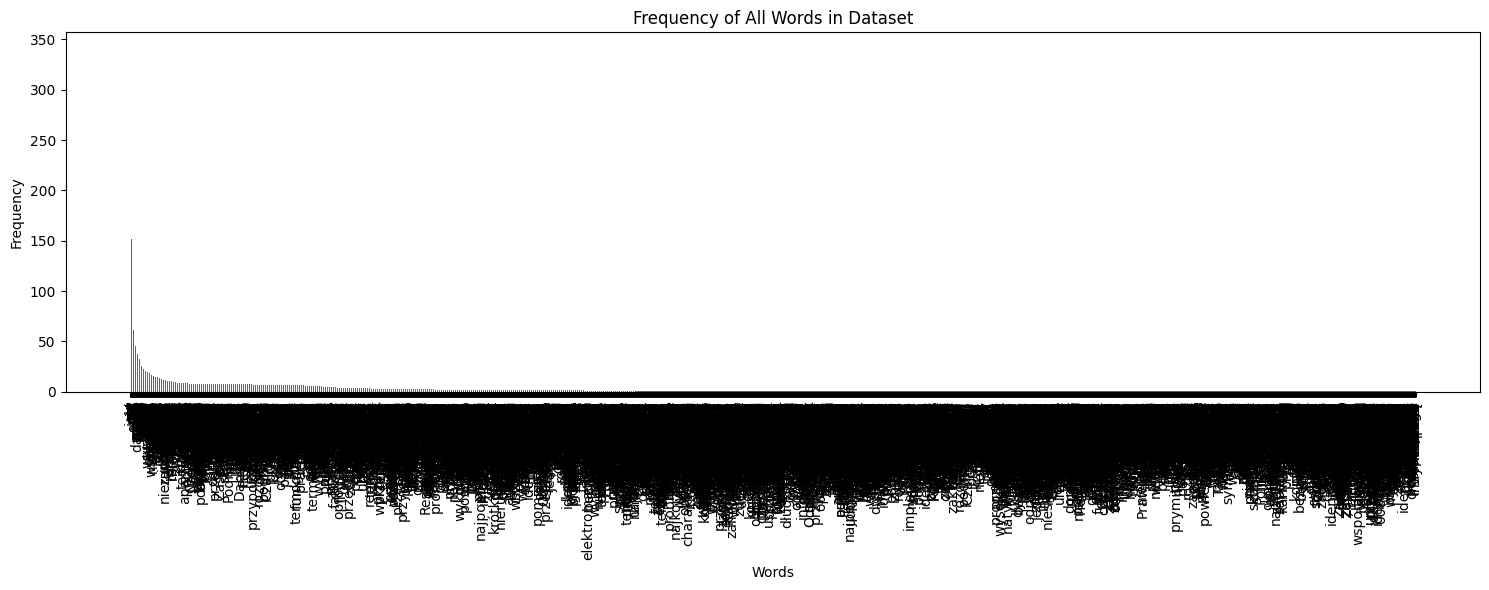

In [ ]:
import os
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from collections import Counter

def barplot(top_words, freq):
    X_axis = np.arange(len(top_words))
    plt.bar(X_axis, freq, 0.4)  
    plt.xticks(X_axis, top_words) 
    plt.xlabel("Words") 
    plt.ylabel("Frequency") 
    plt.legend() 
    plt.show()
    return None

def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x


import os 
import matplotlib.pyplot as plt
import numpy as np

def plot_all_words():
    num_of_authors = 8
    words = []
    counts = []

    for author_no in range(num_of_authors):
        file_desc_name = f"author{author_no + 1}/word_places.txt"
        with open(file_desc_name, 'r', encoding='cp1250') as file_desc_ptr:
            lines = file_desc_ptr.read().split('\n')
            for line in lines:
                row_values = line.split()
                if len(row_values) != 6 or row_values[1] == "<brak>" or row_values[0] == '%':
                    continue
                word = row_values[1]
                if word not in words:
                    words.append(word)
                    counts.append(1)
                else:
                    counts[words.index(word)] += 1

    # Sort words by frequency for better visualization
    word_freq_pairs = sorted(zip(words, counts), key=lambda x: x[1], reverse=True)
    words_sorted = [pair[0] for pair in word_freq_pairs]
    counts_sorted = [pair[1] for pair in word_freq_pairs]

    # Plot
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(words_sorted)), counts_sorted)
    plt.xticks(range(len(words_sorted)), words_sorted, rotation=90)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Frequency of All Words in Dataset")
    plt.tight_layout()
    plt.show()

    return words_sorted, counts_sorted

# Example usage
all_words, all_counts = plot_all_words()

def goodlist():
    num_of_authors = 8
    words = []
    enum = []
    for author_no in range(num_of_authors):
        file_desc_name = "author" + str(author_no + 1) + "/word_places.txt"
        file_desc_ptr = open(file_desc_name, 'r', encoding='cp1250')
        text = file_desc_ptr.read()
        lines = text.split('\n')
        number_of_lines = len(lines) - 1

        num_of_words = 0
        for i in range(number_of_lines):
            row_values = lines[i].split()
            if row_values[0] != '%':
                word = row_values[1]
                if word not in words:
                    words.append(word)
                    enum.append(1)
                else:
                    enum[words.index(word)] += 1
                num_of_words += 1
        file_desc_ptr.close()

    top_words = []
    word_freq_pairs = [(word, freq) for word, freq in zip(words, enum) if len(word) > 1]
    word_freq_pairs.sort(key=lambda x: x[1], reverse=True)

    # Select top 30 words
    top_words = [pair[0] for pair in word_freq_pairs[:30]]

    freq = [pair[1] for pair in word_freq_pairs[:30]]

    barplot(top_words, freq)


    return top_words, freq


def display_img(subimage):
    plt.title("Author")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.imshow(subimage, cmap='gray')
    plt.show()

def adjust_image(row_values, image):
    row1, column1, row2, column2 = int(row_values[2]), int(row_values[3]), \
                    int(row_values[4]), int(row_values[5])
    if row1 > row2:
        row1, row2 = row2, row1
        print(row_values, author_no)
    if column1 > column2:
        column1, column2 = column2, column1
        print(row_values, author_no)
    row1 = max(row1, 0)
    column1 = max(column1, 0)
    subimage = image[row1:row2, column1:column2]           # extracting the word image from the whole text
    subimage = cv2.resize(subimage, (400, 100))            # resizing it to the format ( width = 400 | height = 100)
    subimage = cv2.cvtColor(subimage, cv2.COLOR_BGRA2GRAY) # turning the colors into greyscale
    return subimage

def table_all_words(words):
    word_counts = Counter(words)
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    df = df.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return df

# Example usage
all_words_table = table_all_words(all_words)

In [15]:
import os
from collections import Counter

def word_frequency_summary(num_of_authors=8, max_count=7):
    words = []

    # Read all words from dataset
    for author_no in range(num_of_authors):
        file_desc_name = f"author{author_no + 1}/word_places.txt"
        with open(file_desc_name, 'r', encoding='latin1') as f:  # avoid Unicode issues
            lines = f.read().split('\n')
            for line in lines:
                row_values = line.split()
                if len(row_values) != 6 or row_values[1] == "<brak>" or row_values[0] == '%':
                    continue
                words.append(row_values[1])

    # Count frequency of each word
    word_counts = Counter(words)

    # Count how many words occur exactly 1, 2, ..., max_count times
    freq_summary = {i: 0 for i in range(1, max_count+1)}
    for count in word_counts.values():
        if count in freq_summary:
            freq_summary[count] += 1

    # Total unique words
    total_words = len(word_counts)

    # Print results
    print(f"Total unique words: {total_words}")
    for i in range(1, max_count+1):
        print(f"Words occurring exactly {i} time(s): {freq_summary[i]}")

    return word_counts, freq_summary

# Example usage
all_word_counts, summary = word_frequency_summary(max_count=7)


Total unique words: 4500
Words occurring exactly 1 time(s): 2908
Words occurring exactly 2 time(s): 524
Words occurring exactly 3 time(s): 229
Words occurring exactly 4 time(s): 115
Words occurring exactly 5 time(s): 48
Words occurring exactly 6 time(s): 67
Words occurring exactly 7 time(s): 178


In [11]:
all_words_table = table_all_words(all_words)
all_words_table.head(100)

,Word,Count
0,zapisał,1
1,w,1
2,i,1
3,na,1
4,z,1
...,...,...
95,mieszkał,1
96,było,1
97,obiektu,1
98,poprzez,1


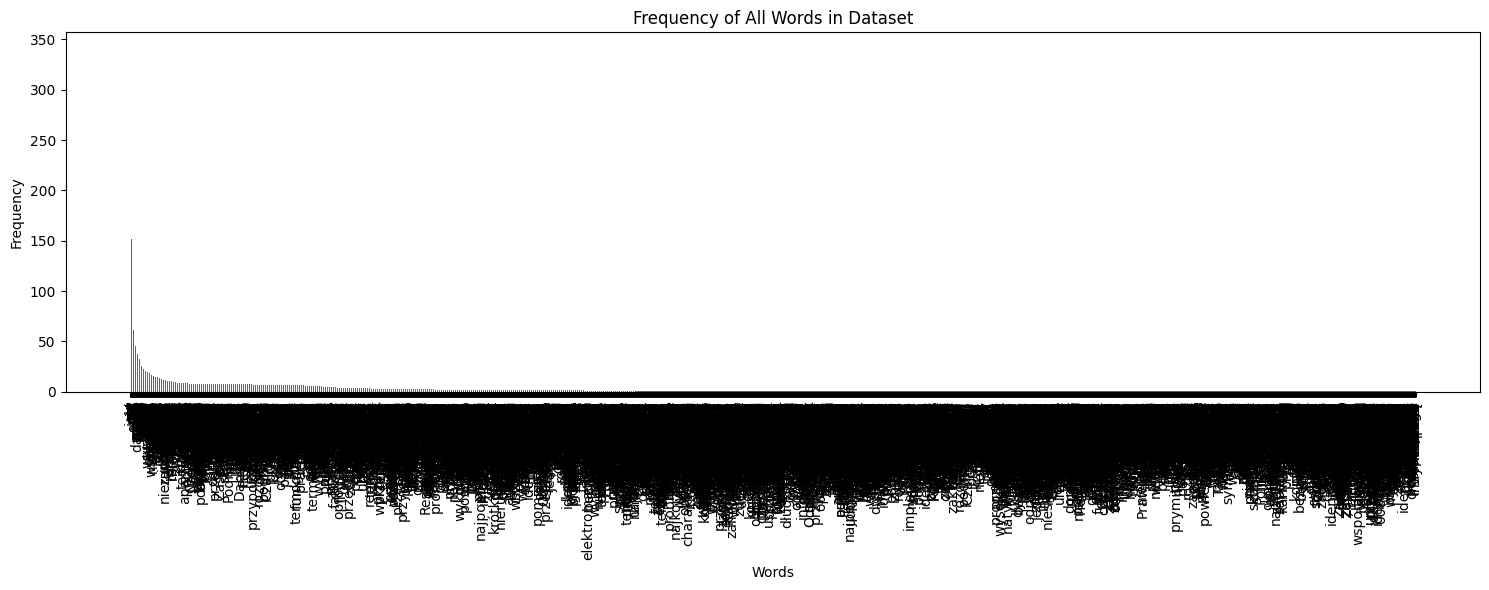

In [7]:
all_words, all_counts = plot_all_words()

In [16]:
top_words, top_freq = goodlist()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 412: invalid start byte